In [0]:
import pandas as pd #Data Wrangling
import numpy as np #Numpy array
import pandas_profiling #Descriptive Analytics
import pylab as pl
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [113]:
# read the movies.dat file
df1 = pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Generes'])
df1.head()

,MovieID,Title,Generes
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [114]:
# test total no of rows in dataframe df1
df1_tot_rows=len(df1)
df1_tot_rows
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3883 entries, 0 to 3882
Data columns (total 3 columns):
MovieID    3883 non-null int64
Title      3883 non-null object
Generes    3883 non-null object
dtypes: int64(1), object(2)
memory usage: 91.1+ KB


In [115]:
# read the ratings.dat file
df2 = pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating','Timestamp'])
df2.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [116]:
df2_tot_rows=len(df2)
df2_tot_rows
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000209 entries, 0 to 1000208
Data columns (total 4 columns):
UserID       1000209 non-null int64
MovieID      1000209 non-null int64
Rating       1000209 non-null int64
Timestamp    1000209 non-null int64
dtypes: int64(4)
memory usage: 30.5 MB


In [117]:
# read the users.dat file
df3 = pd.read_csv('users.dat',sep='::',names=['UserID','Genere','Age','Occupation','Zip-code'])
df3.head()

,UserID,Genere,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [118]:
df3_tot_rows=len(df3)
df3_tot_rows

6040

In [0]:
# Merge DataFrame df1 and df2 using primary key "MovieID"
df1_df2=pd.merge(df1, df2, on="MovieID")

In [120]:
df1_df2.head()

,MovieID,Title,Generes,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [0]:
# Merge previous mergrged DataFrame to df3 using primary key "UserID"
Master_Data=pd.merge(df1_df2, df3, on="UserID")

In [122]:
Master_Data.head()

,MovieID,Title,Generes,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


Text(0.5, 1.0, 'User Age Distribution')

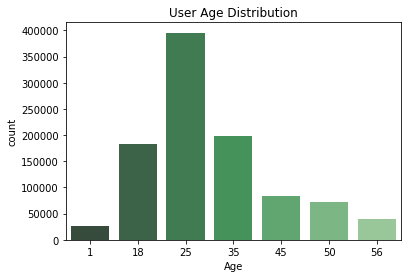

In [123]:
# create graph of User Age Distribution 
ax=sns.countplot(x="Age",data=Master_Data,palette="Greens_d")
plt.title("User Age Distribution")

In [124]:
Master_Data.describe()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,1.865540e+03,3.024512e+03,3.581564e+00,9.722437e+08,2.973831e+01,8.036138e+00
std,1.096041e+03,1.728413e+03,1.117102e+00,1.215256e+07,1.175198e+01,6.531336e+00
min,1.000000e+00,1.000000e+00,1.000000e+00,9.567039e+08,1.000000e+00,0.000000e+00
25%,1.030000e+03,1.506000e+03,3.000000e+00,9.653026e+08,2.500000e+01,2.000000e+00
50%,1.835000e+03,3.070000e+03,4.000000e+00,9.730180e+08,2.500000e+01,7.000000e+00
75%,2.770000e+03,4.476000e+03,4.000000e+00,9.752209e+08,3.500000e+01,1.400000e+01
max,3.952000e+03,6.040000e+03,5.000000e+00,1.046455e+09,5.600000e+01,2.000000e+01


Text(0.5, 1.0, 'User Rating Distribution of Movie Toy Story')

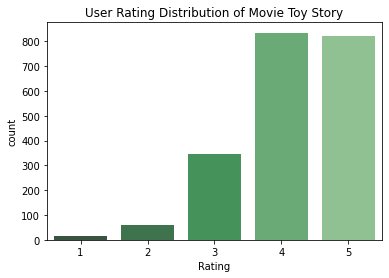

In [125]:
# create graph of User rating of the movie “Toy Story”
ax1=sns.countplot(x="Rating",data=Master_Data[Master_Data["Title"]=="Toy Story (1995)"],palette="Greens_d")
plt.title("User Rating Distribution of Movie Toy Story")

In [126]:
# Display User rating of the movie “Toy Story”
Master_Data['Rating'][Master_Data['Title']=='Toy Story (1995)'].value_counts()

4    835
5    820
3    345
2     61
1     16
Name: Rating, dtype: int64

In [127]:
# top movies with 5 star rating
Topmovies=Master_Data['Title'][Master_Data['Rating']==5].value_counts()
# Top 25 movies by viewership rating
Topmovies.head(25)

American Beauty (1999)                                   1963
Star Wars: Episode IV - A New Hope (1977)                1826
Raiders of the Lost Ark (1981)                           1500
Star Wars: Episode V - The Empire Strikes Back (1980)    1483
Schindler's List (1993)                                  1475
Godfather, The (1972)                                    1475
Shawshank Redemption, The (1994)                         1457
Matrix, The (1999)                                       1430
Saving Private Ryan (1998)                               1405
Sixth Sense, The (1999)                                  1385
Silence of the Lambs, The (1991)                         1350
Fargo (1996)                                             1278
Braveheart (1995)                                        1206
Pulp Fiction (1994)                                      1193
Princess Bride, The (1987)                               1186
Usual Suspects, The (1995)                               1144
Star War

In [128]:
# Find the ratings for all the movies reviewed by for a particular user of user id = 2696
df4=pd.DataFrame(Master_Data)
df4
# selecting rows based on condition 
userid_2696=df4[df4['UserID'] == 2696] 
userid_2696

,MovieID,Title,Generes,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [129]:
# now split the data of Genere like Drama|Mystery|Thriller  into 6 columns
Generes_split=df4
# Find the maximum count of Generes is 6 with pipe serated value
Generes_split['Generes_Count'] = Generes_split['Generes'].str.split("|").str.len()
Generes_split['Generes_Count']
Max_Generes_Count=max(Generes_split['Generes_Count'])
'Maximum count of Generes is %', Max_Generes_Count
# find the unique values of column Generes
Generes_split['Generes'].unique().tolist()

["Animation|Children's|Comedy",
 "Animation|Children's|Musical|Romance",
 'Drama',
 'Action|Adventure|Fantasy|Sci-Fi',
 'Drama|War',
 "Children's|Drama",
 "Animation|Children's|Comedy|Musical",
 "Animation|Children's|Musical",
 'Crime|Drama|Thriller',
 'Animation',
 'Animation|Comedy|Thriller',
 'Musical|Romance',
 "Adventure|Children's|Drama|Musical",
 'Musical',
 "Children's|Comedy|Musical",
 "Children's|Drama|Fantasy|Sci-Fi",
 'Action|Adventure|Comedy|Romance',
 'Comedy|Sci-Fi',
 'Action|Adventure|Drama',
 "Adventure|Animation|Children's|Comedy|Musical",
 'Drama|Romance',
 "Animation|Children's",
 'Action|Drama|War',
 'Comedy',
 'Romance',
 'Action|Crime|Romance',
 'Thriller',
 'Comedy|Fantasy',
 'Comedy|Drama',
 "Children's|Comedy|Drama",
 'Drama|Musical',
 'Drama|Romance|War|Western',
 'Crime|Drama',
 'Action|Comedy|Western',
 'Action|Romance|Thriller',
 'Western',
 "Children's|Comedy",
 'Adventure|Drama|Western',
 'Comedy|Romance',
 'Comedy|Drama|Romance',
 'Drama|Romance|War',
 

In [130]:
# As 6 is maximum count with pipe separated values in column 'Generes'
# we can make 6 new column from that as below
Generes_split[['Generes1','Generes2','Generes3','Generes4','Generes5','Generes6']]=Generes_split.Generes.str.split('|',expand=True)
Generes_split.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 17 columns):
MovieID          1000209 non-null int64
Title            1000209 non-null object
Generes          1000209 non-null object
UserID           1000209 non-null int64
Rating           1000209 non-null int64
Timestamp        1000209 non-null int64
Genere           1000209 non-null object
Age              1000209 non-null int64
Occupation       1000209 non-null int64
Zip-code         1000209 non-null object
Generes_Count    1000209 non-null int64
Generes1         1000209 non-null object
Generes2         689510 non-null object
Generes3         304986 non-null object
Generes4         93496 non-null object
Generes5         13383 non-null object
Generes6         231 non-null object
dtypes: int64(7), object(10)
memory usage: 137.4+ MB


In [131]:
Generes_split.head()

,MovieID,Title,Generes,UserID,Rating,Timestamp,Genere,Age,Occupation,Zip-code,Generes_Count,Generes1,Generes2,Generes3,Generes4,Generes5,Generes6
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067,3,Animation,Children's,Comedy,None,None,None
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067,4,Animation,Children's,Musical,Romance,None,None
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067,1,Drama,None,None,None,None,None
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067,4,Action,Adventure,Fantasy,Sci-Fi,None,None
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067,2,Drama,War,None,None,None,None


In [132]:
# find out only the unique categories of Genres
pd.unique(Generes_split[['Generes1','Generes2','Generes3','Generes4','Generes5','Generes6']].values.ravel()).tolist()

['Animation',
 "Children's",
 'Comedy',
 None,
 'Musical',
 'Romance',
 'Drama',
 'Action',
 'Adventure',
 'Fantasy',
 'Sci-Fi',
 'War',
 'Crime',
 'Thriller',
 'Western',
 'Horror',
 'Mystery',
 'Documentary',
 'Film-Noir']

In [133]:
# Create a separate column for each genre category with a one-hot encoding ( 1 and 0)
# whether or not the movie belongs to that genre
cat_columns = ['Generes1','Generes2','Generes3','Generes4','Generes5','Generes6']
Generes_hot_encode = pd.get_dummies(Generes_split,prefix_sep='_',columns=cat_columns)
Generes_hot_encode.info()
#Generes_hot_encode.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 81 columns):
MovieID                 1000209 non-null int64
Title                   1000209 non-null object
Generes                 1000209 non-null object
UserID                  1000209 non-null int64
Rating                  1000209 non-null int64
Timestamp               1000209 non-null int64
Genere                  1000209 non-null object
Age                     1000209 non-null int64
Occupation              1000209 non-null int64
Zip-code                1000209 non-null object
Generes_Count           1000209 non-null int64
Generes1_Action         1000209 non-null uint8
Generes1_Adventure      1000209 non-null uint8
Generes1_Animation      1000209 non-null uint8
Generes1_Children's     1000209 non-null uint8
Generes1_Comedy         1000209 non-null uint8
Generes1_Crime          1000209 non-null uint8
Generes1_Documentary    1000209 non-null uint8
Generes1_Drama          1000209 non-n

In [134]:
# Determine the features affecting the ratings of any particular movie.
# Here we will use/apply PCA.
# Principal Component Analysis (PCA) is a linear dimensionality reduction technique 
# that can be utilized for extracting information from a high-dimensional space by 
# projecting it into a lower-dimensional sub-space. It tries to preserve the essential 
# parts that have more variation of the data and remove the non-essential parts with 
# fewer variation.
# For PCA - we need to consider only numeric value

# step 1 :- we need to remove non numeric and unnecessary column from the encoded dataset

PCA_df1 = Generes_hot_encode
# drop the non numeric and unnecessary columns from PCA dataset
PCA_df1 = PCA_df1.drop(['MovieID','Title','Generes','UserID','Rating','Timestamp','Genere','Zip-code','Generes_Count'], axis=1)
#PCA_df1.info()

# step 2 :- Convert categorical variable into dummy/indicator variables

cat_columns = ['Age','Occupation']
PCA_df1_hot_encode = pd.get_dummies(PCA_df1,prefix_sep='_',columns=cat_columns)
PCA_df1_hot_encode.info()
#PCA_df1_hot_encode.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 98 columns):
Generes1_Action         1000209 non-null uint8
Generes1_Adventure      1000209 non-null uint8
Generes1_Animation      1000209 non-null uint8
Generes1_Children's     1000209 non-null uint8
Generes1_Comedy         1000209 non-null uint8
Generes1_Crime          1000209 non-null uint8
Generes1_Documentary    1000209 non-null uint8
Generes1_Drama          1000209 non-null uint8
Generes1_Fantasy        1000209 non-null uint8
Generes1_Film-Noir      1000209 non-null uint8
Generes1_Horror         1000209 non-null uint8
Generes1_Musical        1000209 non-null uint8
Generes1_Mystery        1000209 non-null uint8
Generes1_Romance        1000209 non-null uint8
Generes1_Sci-Fi         1000209 non-null uint8
Generes1_Thriller       1000209 non-null uint8
Generes1_War            1000209 non-null uint8
Generes1_Western        1000209 non-null uint8
Generes2_Adventure      1000209 non-null 

In [135]:
from sklearn.decomposition import PCA
# PCA_df1_hot_encode : Data columns (total 98 columns)
pca_object = PCA(n_components=98)
principalComponents = pca_object.fit_transform(PCA_df1_hot_encode)
principalComponents

array([[-1.99930892e-01,  1.69774645e-01,  1.25973610e-01, ...,
         1.52768529e-13,  1.33258420e-14, -4.35196243e-14],
       [-2.18182798e-01,  1.44799965e-01,  1.26417680e-01, ...,
        -9.70403021e-14, -6.16664470e-14, -2.85475366e-14],
       [-2.86466898e-01,  4.73975867e-02,  7.80395461e-01, ...,
         6.76912728e-14, -6.48963812e-14,  3.25841745e-14],
       ...,
       [-1.07297392e-02, -9.07379083e-01, -5.45246548e-01, ...,
         4.67247493e-17, -3.51472327e-17,  2.28023275e-18],
       [ 8.64534388e-01,  2.68372796e-01, -2.91199131e-01, ...,
        -1.66103112e-16,  4.52233010e-17,  1.31531747e-17],
       [ 7.86003233e-01,  1.46982970e-01, -5.63820151e-01, ...,
        -2.18092566e-16,  6.39529665e-17,  6.85489167e-18]])

In [136]:
principalDf = pd.DataFrame(data = principalComponents)
principalDf

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,...,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97
0,-0.199931,0.169775,0.125974,0.035151,0.342730,0.355747,0.707252,-0.915979,-0.143625,-0.499503,-0.528807,-0.120159,0.173282,0.002888,-0.077141,-0.124681,-0.817861,0.283111,-0.203004,-0.366544,-0.714296,-0.023949,0.787545,-0.267179,-0.118916,-0.440891,-0.474831,0.102580,-0.140778,0.037456,0.026424,-0.060187,-0.292059,0.052825,-0.050676,0.159714,-0.052407,-0.029160,-0.050545,0.248094,...,0.007021,-0.015430,0.050172,-0.096625,-0.075195,0.083744,-0.032730,-0.096712,0.088330,-0.061725,0.087107,-0.098878,-0.092885,0.021907,-0.002367,0.008830,-0.002882,0.023921,-0.044736,-0.073623,-0.087745,-0.112735,-0.037248,0.001201,-0.001112,0.000720,-0.000167,0.016437,0.003863,0.010012,0.039673,-0.004620,-0.008174,0.014611,-0.003263,-9.740767e-03,-0.001908,1.527685e-13,1.332584e-14,-4.351962e-14
1,-0.218183,0.144800,0.126418,0.031674,0.342976,0.340822,0.702455,-0.854465,-0.128431,-0.414247,-0.485811,-0.112979,0.174915,0.013900,-0.062753,-0.129797,-0.617400,0.353112,-0.212470,-0.362882,-0.722807,0.030244,0.820069,-0.288363,-0.086827,-0.499739,-0.460498,0.110533,-0.138348,0.041627,0.150338,-0.076752,0.215701,0.030363,-0.061787,-0.204944,-0.027825,0.010052,0.017996,-0.353303,...,-0.013437,0.194113,0.044706,0.118267,0.258267,0.635867,-0.006537,-0.067999,-0.189024,0.115947,-0.200174,0.253727,0.217195,-0.056058,-0.028055,-0.075697,-0.001806,-0.022152,0.018804,0.028744,0.085551,0.234581,0.058204,-0.003561,0.010498,-0.000894,-0.001833,-0.017878,-0.016585,-0.039961,-0.035899,0.002417,0.027280,-0.047939,0.004745,2.088482e-02,0.003746,-9.704030e-14,-6.166645e-14,-2.854754e-14
2,-0.286467,0.047398,0.780395,0.264264,0.181807,-0.254618,0.046256,0.051973,-0.079484,-0.115339,0.069187,-0.234492,0.043273,-0.174108,-0.041833,-0.137784,-0.063759,0.171215,-0.229370,-0.412493,-0.736455,-0.265420,0.769168,-0.249474,-0.190825,-0.142616,-0.600552,0.239683,-0.140712,0.017786,-0.067913,-0.060663,-0.043165,-0.008272,-0.068502,0.014565,-0.010337,-0.055436,0.001057,-0.047646,...,0.026140,0.001300,-0.015017,0.007443,-0.006489,0.003391,0.015288,-0.074770,-0.012219,0.002279,-0.006735,-0.017371,0.012576,0.013499,-0.015509,0.001528,-0.002969,0.001082,-0.009798,0.004450,0.000039,-0.000678,-0.000147,-0.000733,0.002602,-0.001368,-0.001789,-0.001518,0.000959,-0.000637,0.000504,0.000630,-0.000157,0.000261,-0.000525,1.314508e-04,-0.000316,6.769127e-14,-6.489638e-14,3.258417e-14
3,0.445768,0.966343,-0.306535,-0.220103,0.197688,-0.388125,-0.111264,-0.179925,-0.150732,-0.489119,0.050267,-0.165378,0.097533,-0.097299,-0.025341,-0.166933,-0.269953,-0.019951,-0.176152,-0.470001,-0.646767,-0.984974,0.596932,-0.299961,-0.161595,0.154301,-0.675036,0.134087,-0.141465,0.254470,-0.053452,-0.085695,0.843442,0.034200,-0.078853,-0.017568,-0.008494,0.205269,-0.014114,0.213693,...,-0.019110,0.018464,0.001317,0.006518,0.006484,-0.084658,0.046574,-0.065699,0.001423,-0.016081,0.062067,-0.058306,-0.007566,0.004689,-0.078022,-0.105783,-0.009372,-0.044954,0.049334,0.040480,0.017267,0.015502,0.004110,0.000409,0.001421,0.000066,0.000236,0.004492,-0.002780,-0.007796,-0.030815,0.001946,0.002563,0.005716,-0.002925,-3.137811e-03,-0.000018,1.294247e-15,1.914165e-14,-1.376111e-16
4,-0.292211,0.045262,0.827849,0.277252,0.181003,-0.265723,0.042106,0.066998,-0.080162,-0.136609,0.095346,-0.259686,0.020456,-0.227635,-0.033279,-0.137921,-0.056567,0.217828,-0.233969,-0.406669,-0.736435,-0.269314,0.755083,-0.237200,-0.186647,-0.106315,-0.580105,0.302282,-0.150253,-0.022774,-0.206480,-0.050799,-0.121403,-0.300498,-0.050227,-0.418960,-0.244189,0.512687,-0.080388,0.123970,...,0.011965,-0.001856,-0.012932,0.002169,0.018940,-0.005116,0.028053,-0.073397,0.006114,-0.007009,0.012074,0.018336,-0.011883,-0.002583,0.015510,-0.006210,0.001324,-0.006198,0.001574,-0.001598,0.000229,0.001821,-0.002096,-0.000

In [137]:
import numpy as np
#The amount of variance that each PC explains
var= pca_object.explained_variance_ratio_
var

array([8.79560281e-02, 8.72287924e-02, 7.04158830e-02, 6.50208164e-02,
       3.55822307e-02, 3.51167430e-02, 3.43178793e-02, 3.09837186e-02,
       2.75697997e-02, 2.65068454e-02, 2.41106082e-02, 2.25191650e-02,
       2.21237899e-02, 2.19891255e-02, 1.94216332e-02, 1.90900717e-02,
       1.83607608e-02, 1.69719301e-02, 1.67243140e-02, 1.54222379e-02,
       1.43089664e-02, 1.41552140e-02, 1.38968441e-02, 1.30013389e-02,
       1.29317257e-02, 1.25745037e-02, 1.20298601e-02, 1.14688383e-02,
       1.08299894e-02, 1.00480249e-02, 9.55071681e-03, 9.31955662e-03,
       8.21691587e-03, 8.13480293e-03, 7.13997949e-03, 7.06883132e-03,
       6.92334247e-03, 6.37808136e-03, 6.33549800e-03, 6.07072630e-03,
       5.92787132e-03, 5.92236324e-03, 5.33740552e-03, 4.83186152e-03,
       4.40474011e-03, 4.29093068e-03, 3.99292776e-03, 3.81553164e-03,
       3.68469357e-03, 3.62202912e-03, 3.29426506e-03, 3.17776925e-03,
       3.09690013e-03, 3.07634907e-03, 2.80385843e-03, 2.77642939e-03,
      

In [138]:
# For good confirmation of the factor analysis, the variance should not be less than 60%
# The fraction of variance explained by a principal component is the ratio between 
# the variance of that principal component and the total variance. 
# For several principal components, add up their variances and divide by the total variance.
var1=np.cumsum(np.round(pca_object.explained_variance_ratio_, decimals=4)*100)
var1

array([ 8.8 , 17.52, 24.56, 31.06, 34.62, 38.13, 41.56, 44.66, 47.42,
       50.07, 52.48, 54.73, 56.94, 59.14, 61.08, 62.99, 64.83, 66.53,
       68.2 , 69.74, 71.17, 72.59, 73.98, 75.28, 76.57, 77.83, 79.03,
       80.18, 81.26, 82.26, 83.22, 84.15, 84.97, 85.78, 86.49, 87.2 ,
       87.89, 88.53, 89.16, 89.77, 90.36, 90.95, 91.48, 91.96, 92.4 ,
       92.83, 93.23, 93.61, 93.98, 94.34, 94.67, 94.99, 95.3 , 95.61,
       95.89, 96.17, 96.43, 96.67, 96.91, 97.13, 97.34, 97.54, 97.73,
       97.91, 98.08, 98.24, 98.4 , 98.55, 98.69, 98.82, 98.94, 99.05,
       99.15, 99.24, 99.32, 99.4 , 99.48, 99.56, 99.61, 99.66, 99.7 ,
       99.74, 99.78, 99.81, 99.84, 99.87, 99.89, 99.91, 99.93, 99.95,
       99.97, 99.98, 99.99, 99.99, 99.99, 99.99, 99.99, 99.99])

In [139]:
# in The above output of the explained_variance_ratio in pca_object , we can consider 
# the value >= 99
# considering the value more than 99% which redirects, that Age and Occupation affecting the ratings of any particular movie
# so in the new PCA dataset we are considering only Age, Occupation and target variable Rating
# take the Rating columns from Generes_hot_encode
# take the Age and Occupation columns from PCA_df1_hot_encode

#PCA_df2_hot_encode = PCA_df1_hot_encode.loc[80:98]
#PCA_df2_hot_encode
PCA_df2_hot_encode = PCA_df1_hot_encode[['Age_1','Age_18','Age_25','Age_35','Age_45','Age_50','Age_56','Occupation_0','Occupation_1','Occupation_2','Occupation_3','Occupation_4','Occupation_5','Occupation_6','Occupation_7','Occupation_8','Occupation_9','Occupation_10','Occupation_11','Occupation_12','Occupation_13','Occupation_14','Occupation_15','Occupation_16','Occupation_17','Occupation_18','Occupation_19','Occupation_20']]
#PCA_df2_hot_encode.info()
#PCA_df2_hot_encode.head()
#Generes_hot_encode.head()
#df['columnF'] = pd.Series(df1['columnF'])
PCA_df2_hot_encode['Rating'] = pd.Series(Generes_hot_encode['Rating'])
PCA_df2_hot_encode.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 29 columns):
Age_1            1000209 non-null uint8
Age_18           1000209 non-null uint8
Age_25           1000209 non-null uint8
Age_35           1000209 non-null uint8
Age_45           1000209 non-null uint8
Age_50           1000209 non-null uint8
Age_56           1000209 non-null uint8
Occupation_0     1000209 non-null uint8
Occupation_1     1000209 non-null uint8
Occupation_2     1000209 non-null uint8
Occupation_3     1000209 non-null uint8
Occupation_4     1000209 non-null uint8
Occupation_5     1000209 non-null uint8
Occupation_6     1000209 non-null uint8
Occupation_7     1000209 non-null uint8
Occupation_8     1000209 non-null uint8
Occupation_9     1000209 non-null uint8
Occupation_10    1000209 non-null uint8
Occupation_11    1000209 non-null uint8
Occupation_12    1000209 non-null uint8
Occupation_13    1000209 non-null uint8
Occupation_14    1000209 non-null uint8
Occupat

In [0]:
# Now Try Logistic Rgression 
# split dataset in features and target variable
# build model on top of Master_Data
# Here : dependent variable is Rating
#        independent variables are Age,Occupation
# Master_Data.head()

df_model = Master_Data[['Rating','Age','Occupation']]
#df_model

# Features
#X = PCA_df2_hot_encode[['Age_1','Age_18','Age_25','Age_35','Age_45','Age_50','Age_56','Occupation_0','Occupation_1','Occupation_2','Occupation_3','Occupation_4','Occupation_5','Occupation_6','Occupation_7','Occupation_8','Occupation_9','Occupation_10','Occupation_11','Occupation_12','Occupation_13','Occupation_14','Occupation_15','Occupation_16','Occupation_17','Occupation_18','Occupation_19','Occupation_20']]
#X

X = df_model[['Age','Occupation']]
#X

# Target variable
#y = PCA_df2_hot_encode['Rating']
#y

y = df_model['Rating']
#y

# split X and Y into training and testing sets
# the Dataset is broken into two parts in a ratio of 80:20 
# It means 80% data will be used for model training and 20% for model testing.


from sklearn.model_selection import train_test_split

#X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.75,random_state = 42)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.20,random_state=0)

# apply Logistic Regression
from sklearn.linear_model import LogisticRegression

logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train)
y_pred=logistic_regression.predict(X_test)
#y_pred
#y_test


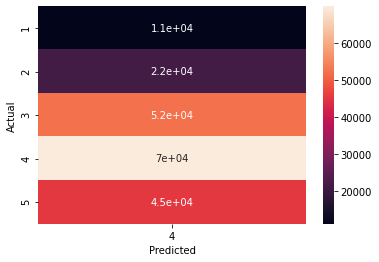

In [163]:
# Model Evaluation using Confusion Matrix
# A confusion matrix is a table that is used to evaluate the performance of a classification model. 
# You can also visualize the performance of an algorithm. 
# The fundamental of a confusion matrix is the number of correct and incorrect predictions 
# are summed up class-wise.
# import the metrics class
import seaborn as sn
#from sklearn.metrics import classification_report, confusion_matrix
from sklearn import metrics


#cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
#cnf_matrix

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

In [165]:
print('Accuracy: ',metrics.accuracy_score(y_test, y_pred))


Accuracy:  0.3491266833964867


In [0]:
# The accuracy is therefore 35% for the test set